In [2]:
%pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import collections
import math
import statistics

Note: you may need to restart the kernel to use updated packages.


In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
dat1=pd.read_csv('figure3.csv',sep=',', encoding='CP932')

In [5]:
list1=[1, 2, 5, 6, 7, 9, 10]
col1=dat1.columns.tolist()
col2=[]
for i in list1:
  col2.append(col1[i])
dat1=dat1.loc[:,col2]

In [6]:
dat1.columns=['Name','FY','A(¥M)','FA(¥M)','PP&E(¥M)','Cash(¥M)','Inventory1(¥M)']
def f(a):
  return(a[:4])
dat1['FY']=dat1['FY'].apply(f)
dat2=dat1.set_index(['Name','FY'])

In [7]:
dat3=dat2.groupby('FY').sum()
dat3['FA/A']=dat3['FA(¥M)']/dat3['A(¥M)']
dat3['Cash/A']=dat3['Cash(¥M)']/dat3['A(¥M)']
dat3['Inventory1/A']=dat3['Inventory1(¥M)']/dat3['A(¥M)']
list3=list(range(1975,2021))

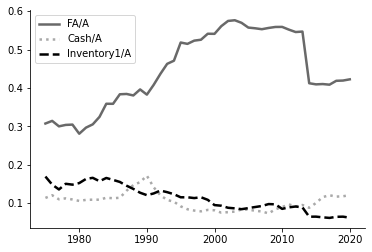

In [25]:
%matplotlib inline
Figure, ax=plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.plot(list3,dat3['FA/A'],label='FA/A',ls='-',lw=2.5,c='dimgrey')
ax.plot(list3,dat3['Cash/A'],label='Cash/A',ls=':',lw=2.5,c='darkgray')
ax.plot(list3,dat3['Inventory1/A'],label='Inventory1/A',ls='--',lw=2.5,c='k')
ax.legend()
plt.show()